##Business uderstanding
The company wants to create a successful movie studio. The goal is to identify trends in the movie industry by analyzing box office data to determine what factors contribute to higher revenues.

##Objectives
1. Understand the relationship between production budgets, domestic gross, and worldwide gross revenue.


2. Develop actionable insights to maximize profitability in future productions.


##Methodology
1. Data Preparation

-Cleaned data by removing symbols (e.g., $, ,) and converting columns to numeric types.
-Converted dates to a usable datetime format.
-Checked for and addressed missing values and duplicates.

2. Data analysis
-Descriptive statistics: Summarized production budgets, domestic gross, and worldwide gross.

-Visualizations: Created scatter plots, histograms, and correlation matrices to explore relationships.

3. Hypothesis Testing

Tested the relationship between production budget and worldwide gross revenue using Pearson correlation.

4. Modeling

Built linear regression models to predict worldwide gross using production budgets.

##Success Criteria
Clear insights into the factors that drive movie success, such as production budget.

##Limitations
The model does not predict extremely high-grossing movies very accurately.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data
#file path = 'tn.movie_budgets.csv.gz'
df = pd.read_csv('tn.movie_budgets.csv.gz', compression='gzip')

Data Understanding

In [ ]:
#five rows
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
# Remove '$' and ',' symbols and convert to numeric
numeric_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in numeric_columns:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])


In [ ]:
#checking number of rows and columns
df.shape

(5782, 6)

In [ ]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [ ]:
#overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [ ]:
#checking for missing values
df.isnull().sum()

,0
id,0
release_date,0
movie,0
production_budget,0
domestic_gross,0
worldwide_gross,0


In [ ]:
#checking for duplicates
df.duplicated().sum()

0

Data Analysis

In [ ]:
# Summary statistics for columns production budget, domestic gross and worldwide gross
df[['production_budget', 'domestic_gross', 'worldwide_gross']].describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


#Visualisation

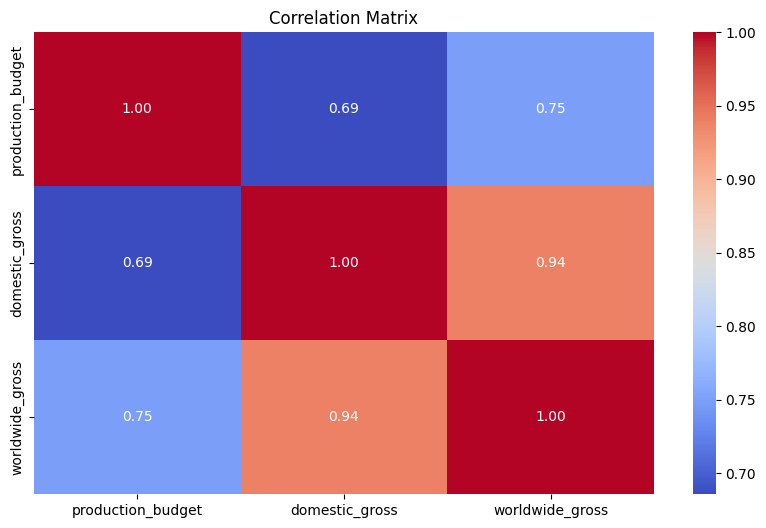

In [ ]:
#Visualisation
#correlation matrix
correlation_matrix = df[['production_budget', 'domestic_gross', 'worldwide_gross']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


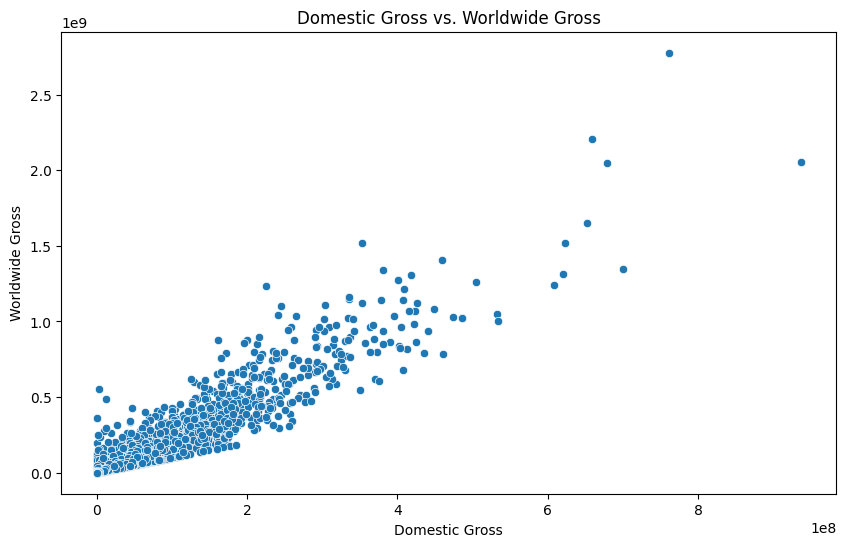

In [ ]:
#a scatter plot to show the relationship between domestic and worldwide gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_gross', y='worldwide_gross', data=df)
plt.xlabel('Domestic Gross')
plt.ylabel('Worldwide Gross')
plt.title('Domestic Gross vs. Worldwide Gross')
plt.show()

In [ ]:
#removing outliers on domestic and worldwide gross using percentiles
#define percentiles
lower_percentile = 0.01
upper_percentile = 0.99

#calculate the threshold values
lower_threshold = df['domestic_gross'].quantile(lower_percentile)
upper_threshold = df['domestic_gross'].quantile(upper_percentile)

lower_threshold_worldwide = df['worldwide_gross'].quantile(lower_percentile)
upper_threshold_worldwide = df['worldwide_gross'].quantile(upper_percentile)

lower_threshold_budget = df['production_budget'].quantile(lower_percentile)
upper_threshold_budget = df['production_budget'].quantile(upper_percentile)

#filter rows where values are outside the bounds
df_cleaned = df[(df['domestic_gross'] >= lower_threshold) & (df['domestic_gross'] <= upper_threshold)]
df_cleaned = df_cleaned[(df_cleaned['worldwide_gross'] >= lower_threshold_worldwide) & (df_cleaned['worldwide_gross'] <= upper_threshold_worldwide)]
df_cleaned = df_cleaned[(df_cleaned['production_budget'] >= lower_threshold_budget) & (df_cleaned['production_budget'] <= upper_threshold_budget)]

#print the cleaned dataset
print("Original dataset size:", df.shape)
print("Cleaned dataset size:", df_cleaned.shape)


Original dataset size: (5782, 6)
Cleaned dataset size: (5631, 6)


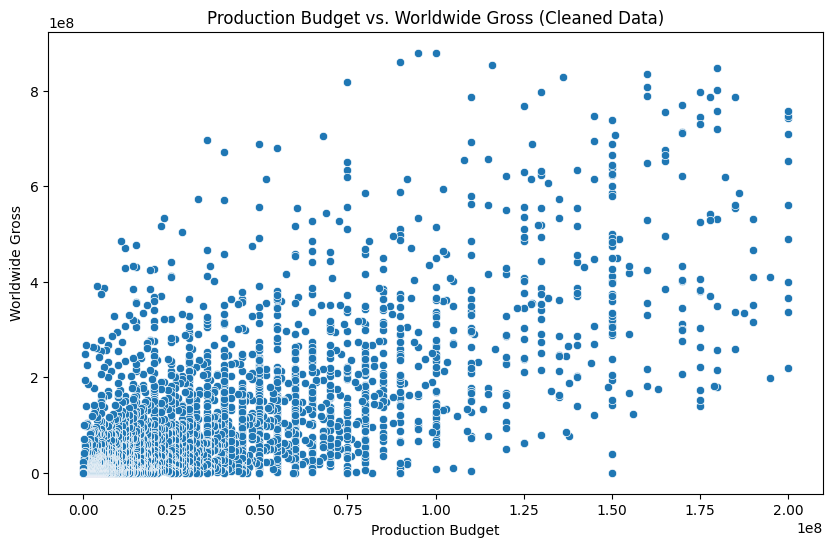

In [ ]:
#plotting scatter plot for production budget
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=df_cleaned)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs. Worldwide Gross (Cleaned Data)')
plt.show()


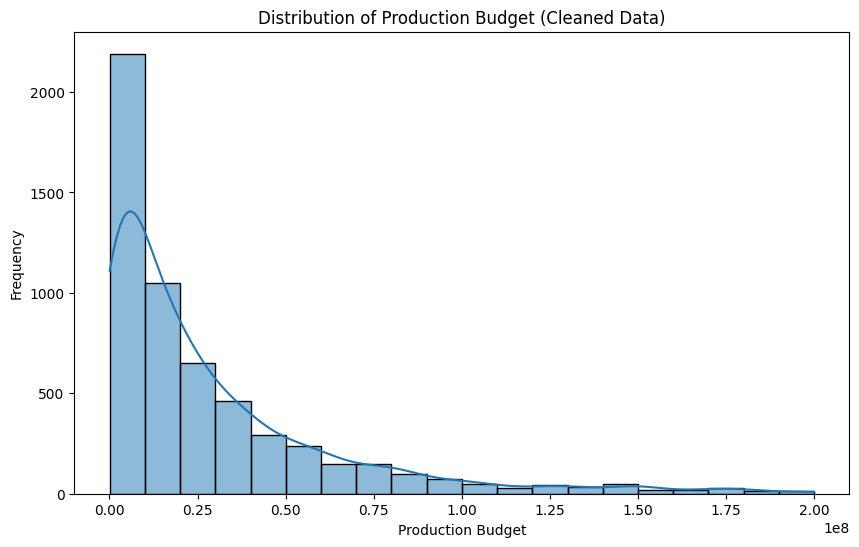

In [ ]:
#plotting a histogram for production budget
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['production_budget'], bins=20, kde=True)
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Production Budget (Cleaned Data)')
plt.show()


#Hypothesis testing
Null hypothesis-There is no significant relationship between production budgets and worldwide gross revenue.

Alternate hypothesis-Higher production budgets lead to higher worldwide gross revenue.

In [ ]:
# Using Pearson correlation
from scipy.stats import pearsonr

# Calculate correlation
correlation, p_value = pearsonr(df_cleaned['production_budget'], df_cleaned['worldwide_gross'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Correlation coefficient: 0.7192765756414683
P-value: 0.0


A correlation coefficient of 0.72 suggests a strong positive correlation between production budget and worldwide gross.This means movies with higher production budgets tend to earn more in worldwide gross revenue.

A p value of 0.0 indicates that the relationship between production budgets and worldwide gross revenue is statistically significant.

Conclusion:Reject the null hypothesis. There is a significant relationship between the production budgets and worldwide gross revenue.

#Linear Regression

In [ ]:
#predicting worldwide gross using production budget
#import libraries
import statsmodels.api as sm

#define the independent and dependent variable
X = df_cleaned['production_budget']
y = df_cleaned['worldwide_gross']

#add a constant to the independent variable
X = sm.add_constant(X)

#fit the linear regression model
model = sm.OLS(y, X).fit()

#print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     6034.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:18:24   Log-Likelihood:            -1.1091e+05
No. Observations:                5631   AIC:                         2.218e+05
Df Residuals:                    5629   BIC:                         2.218e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.554e+06    1.5e+0

Model Evaluation
R-Squared: About 51.7% of the variance in worldwide gross is explained by the production budget.

Coefficient: For every unit increase in production budget, worldwide gross increases by an average of 2.53.

P-Value: The p-value is 0.00, which is less than 0.05. This shows that the model is statistically significant and the production budget has a meaningful impact on worldwide gross.

F-Statistic: The F-statistic (6034) confirms that the model as a whole is statistically significant, meaning that production budget significantly explains worldwide gross.

In [ ]:
#extracting the intercept
intercept = model.params['const']
print(f"Intercept: (Constant) {intercept}")

Intercept: (Constant) 3553931.6418457422


In [ ]:
#extracting the slope
slope = model.params['production_budget']
print(f"Slope: (Coefficient) {slope}")

Slope: (Coefficient) 2.531649874719684


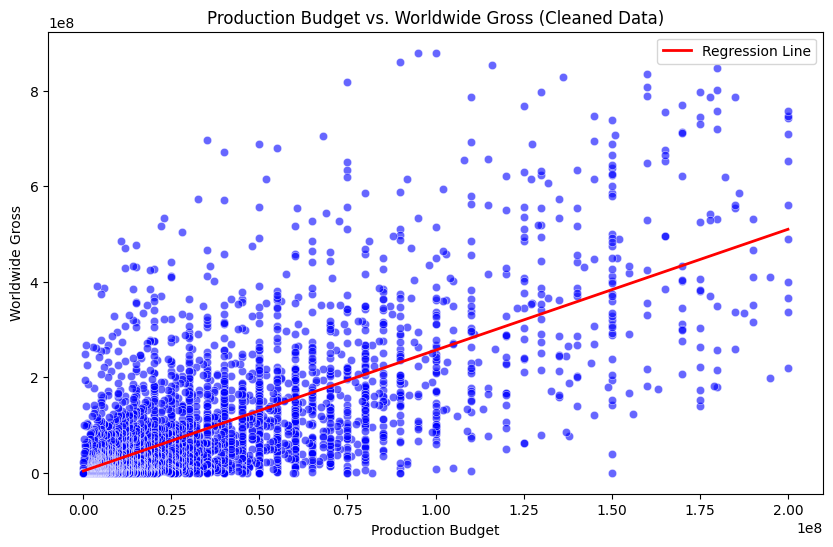

In [ ]:
#Visualization using linear regression
plt.figure(figsize=(10, 6))

# Scatter plot for the cleaned data
sns.scatterplot(x='production_budget', y='worldwide_gross', data=df_cleaned, color='blue', alpha=0.6)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs. Worldwide Gross (Cleaned Data)')

# Define independent and dependent variables
X_cleaned = sm.add_constant(df_cleaned['production_budget'])
y_cleaned = df_cleaned['worldwide_gross']

# Fit the linear regression model
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

# Add regression line
plt.plot(df_cleaned['production_budget'], model_cleaned.predict(X_cleaned), color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()



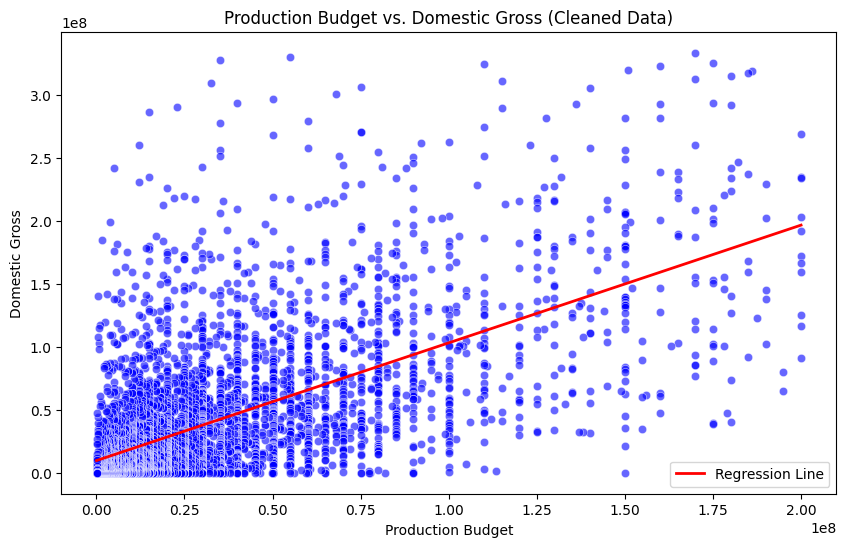

In [ ]:
#plotting linear regression of domestic gross and production budget
plt.figure(figsize=(10, 6))

# Scatter plot for the cleaned data
sns.scatterplot(x='production_budget', y='domestic_gross', data=df_cleaned, color='blue', alpha=0.6)
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.title('Production Budget vs. Domestic Gross (Cleaned Data)')

# Define independent and dependent variables
X_cleaned = sm.add_constant(df_cleaned['production_budget'])  # Add constant for regression
y_cleaned = df_cleaned['domestic_gross']

# Fit the linear regression model
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

# Add regression line
plt.plot(df_cleaned['production_budget'], model_cleaned.predict(X_cleaned), color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()


##Multiple linear regression

In [ ]:
#defining variables
X = df_cleaned[['production_budget', 'domestic_gross']]
y = df_cleaned['worldwide_gross']

#add a constant to the independent variable
X = sm.add_constant(X)

#fit the multiple linear regression model
model_cleaned = sm.OLS(y, X).fit()

#print the summary of the model
print(model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 1.959e+04
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:22:35   Log-Likelihood:            -1.0712e+05
No. Observations:                5631   AIC:                         2.143e+05
Df Residuals:                    5628   BIC:                         2.143e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.452e+07   7.78e+0

R-Squared:87.4% of the variance in worldwide gross is explained by the production budget and domestic gross. This indicates that the model fits the data well.

Coefficients:

For every unit increase in production budget, worldwide gross increases by an average of 0.77, holding domestic gross constant. For every unit increase in domestic gross, worldwide gross increases by an average of 1.88, holding production budget constant.

P-Values: The p-values for both predictors are 0.00, indicating that they are statistically significant contributors to worldwide gross.

F-Statistic: The F-statistic 19,590 confirms that the overall model is statistically significant

###Evaluating model diagnostics

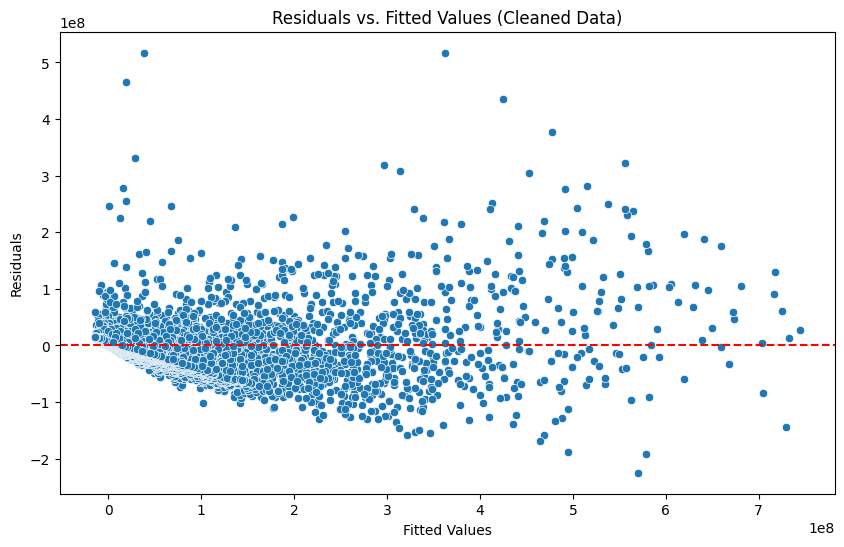

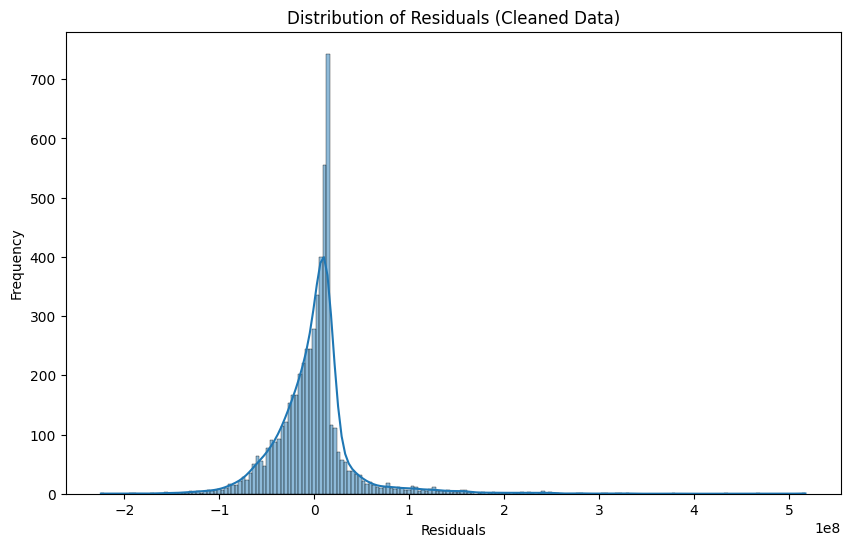

In [ ]:
#plot residuals using fitted values
residuals = model_cleaned.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_cleaned.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Cleaned Data)')
plt.show()

#histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Cleaned Data)')
plt.show()


Observations

The data points are centred around 0 indicating that the model is not biased.

Skewness- The model is highly skewed to the right indicating outliers.

The residuals are randomly scattered but exhibit heteroscedasticity.

##Recommendations
Higher budgets are correlated with higher gross revenue, but only up to a point and therefore optimal budgeting is recommended.